<a href="https://colab.research.google.com/github/DAN-MASH/Machine_learning_models/blob/main/bank_telemarketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
bank = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/bank/bank-full.csv', sep=';',header=0)

In [5]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
bank.shape

(45211, 17)

In [7]:
#data type
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [8]:
#General description of the data
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


DATA CLEANING PROCESS

In [9]:
#Identifying missing values
#There are no missing values in this dataset
bank.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [10]:
#duplicates
#No duplicate values
bank.duplicated().sum()

0

In [11]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

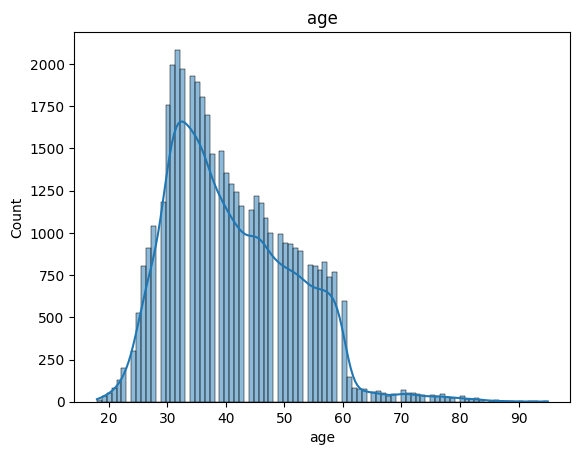

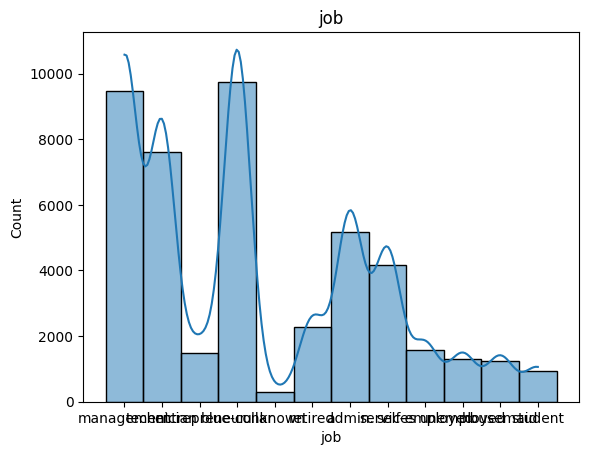

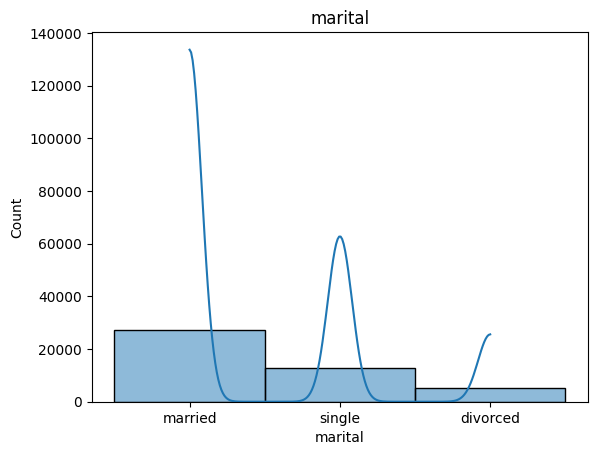

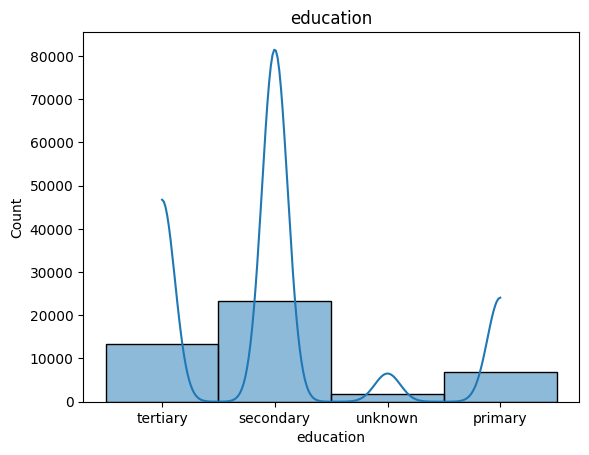

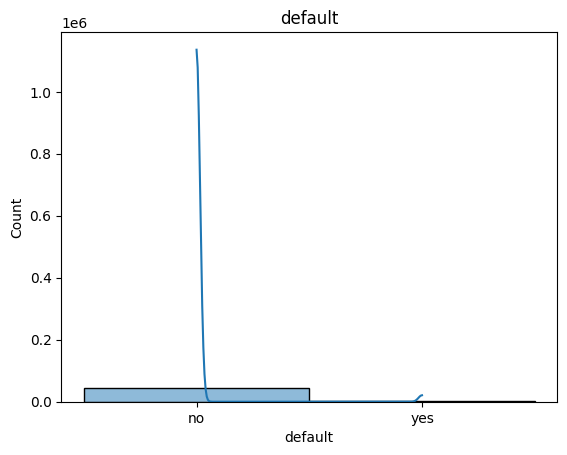

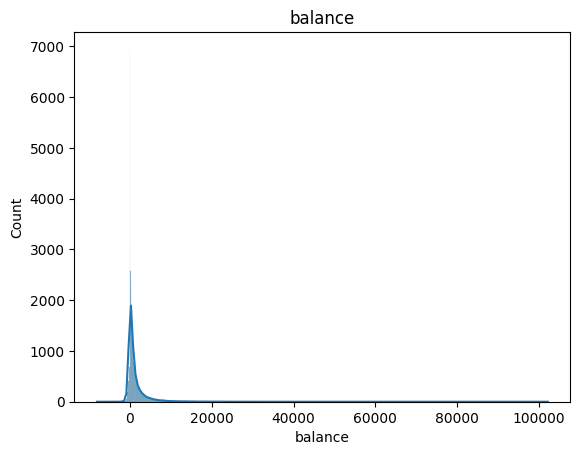

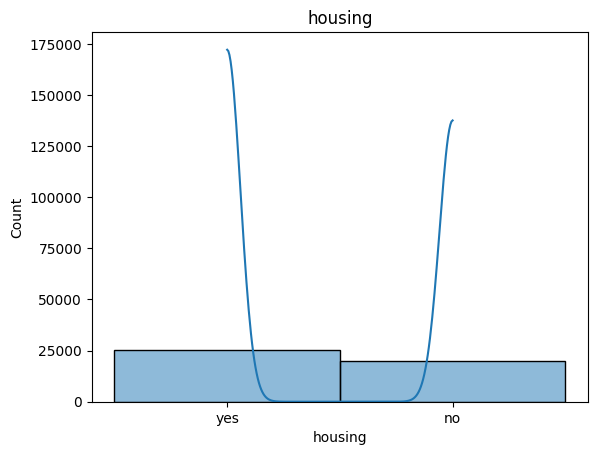

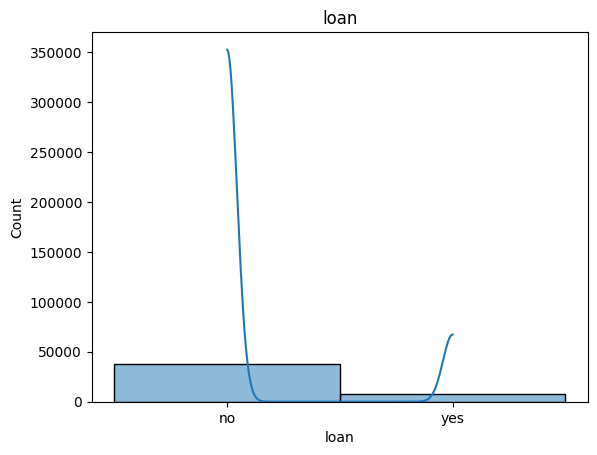

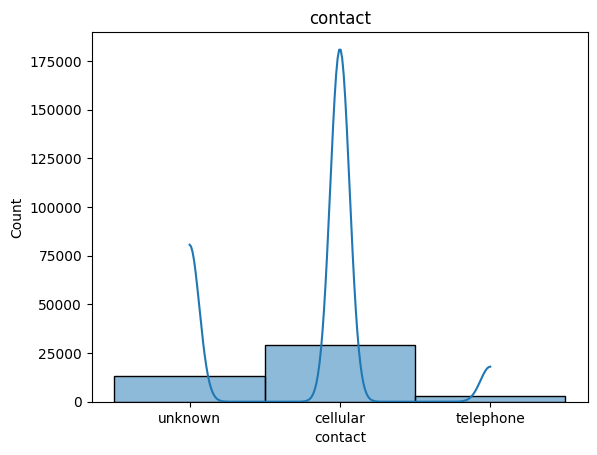

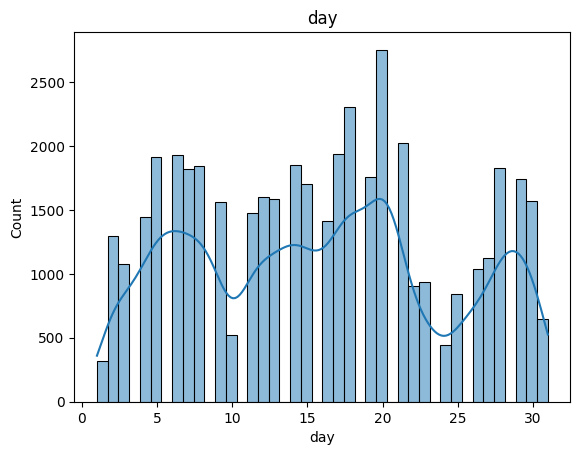

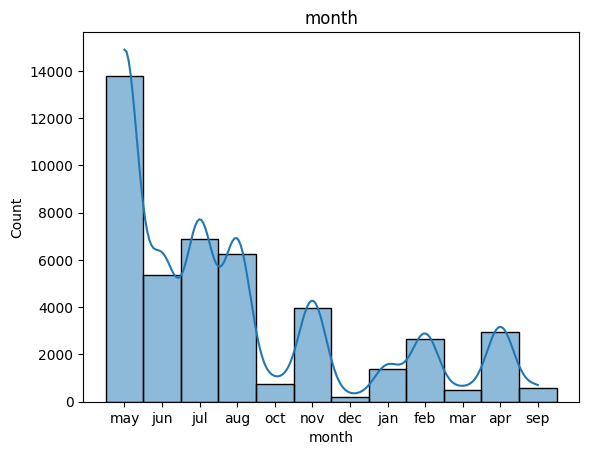

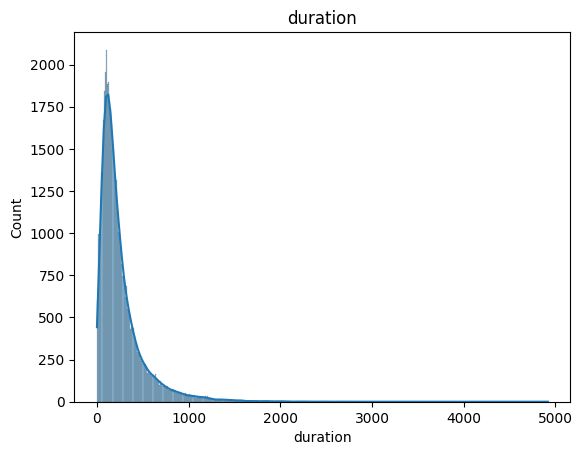

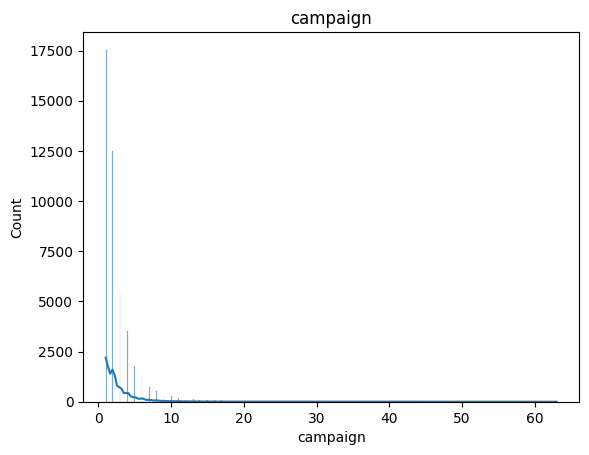

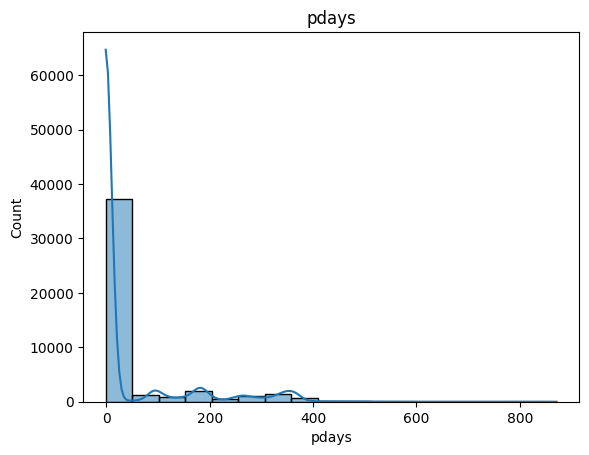

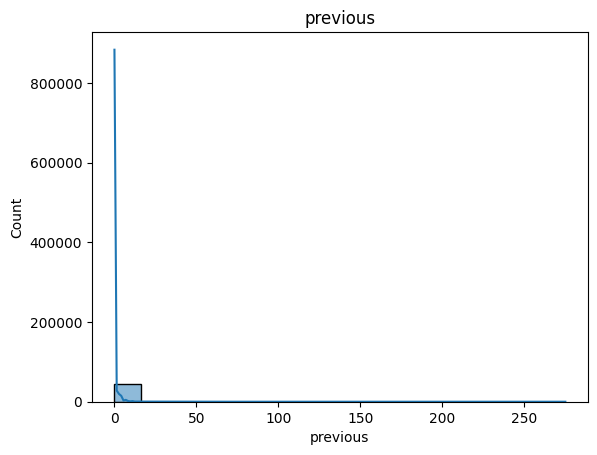

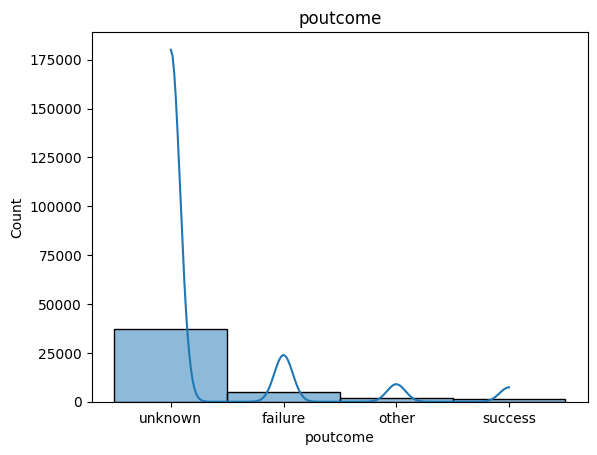

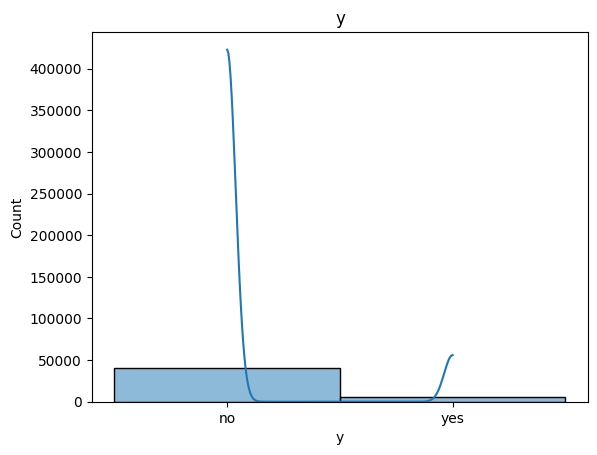

In [12]:
for col in enumerate(bank.columns):
  #plt.subplot(2,3,1)
  #plt.figure(figsize = (5,6))
  sns.histplot(bank[col[1]], kde=True)
  #plt.subplot(2,3,1)
  plt.title(col[1])
  plt.show()

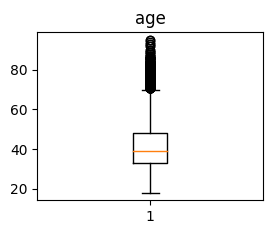

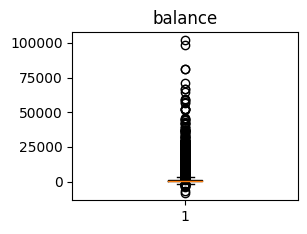

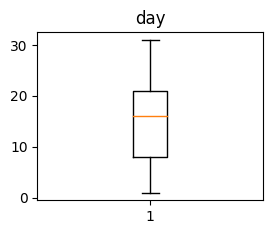

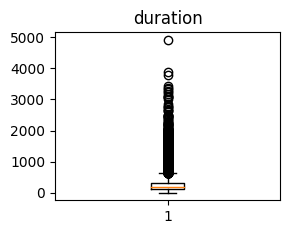

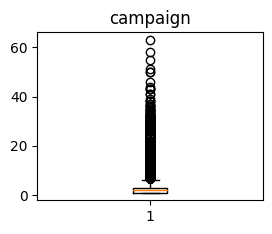

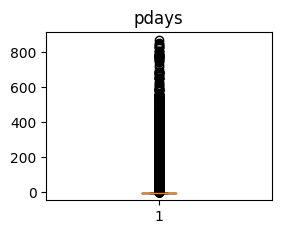

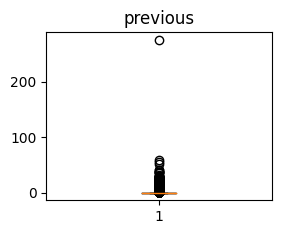

In [13]:
#Detecting Outliers
#generate histograms using a for loop to detect outliers in all the columns
#ensure that the figures are arranged
for col in bank.columns:
  if bank[col].dtype in ['int64', 'float64']:
  #if bank[col].dtype in ['int64', 'float64']: # Check if the column contains numerical data
    plt.subplot(2,2,1)
    plt.boxplot(bank[col])
    plt.title(col) # Add a title to each subplot for clarity
    plt.show()


In [14]:
# def outlier_detector(bank, column):
#   Q1 = bank.quantile(0.25)
#   Q3 = bank.quamtile(0.75)
#   IQR = Q3 - Q1
#   lower_bound = Q1 - 1.5*IQR
#   upper_bound = Q3 + 1.5*IQR
#   filtered_bank= bank[(bank[column] >= lower_bound) & (bank[column] <= upper_bound)]
#   return filtered_bank

In [15]:
for col in bank.columns:
    if bank[col].dtype in ['int64', 'float64']:
        Q1 = bank[col].quantile(0.25)
        Q3 = bank[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        bank1 = bank[(bank[col] >= lower_bound) & (bank[col] <= upper_bound)]

In [16]:
bank.shape

(45211, 17)

In [17]:
bank1.shape

(36954, 17)

In [18]:
bank1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Exploratory Data Analysis (EDA)

I. Univariante Analysis

In [19]:
#Determine the job groups
job = bank1['job'].value_counts()
job

,count
job,
blue-collar,8115
management,7632
technician,6255
admin.,4082
services,3448
retired,1776
self-employed,1298
entrepreneur,1262
unemployed,1090


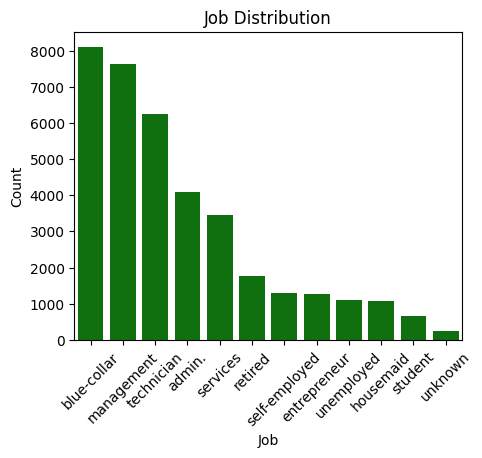

In [20]:
#Box plot showing distribution of jobs
plt.figure(figsize= (5,4))
sns.barplot(x=job.index, y = job.values, color ='green')
plt.xticks(rotation = 45)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Job Distribution')
plt.show()


In [21]:
#Distribution of credit default
default = bank1['default'].value_counts()
default

,count
default,
no,36196
yes,758


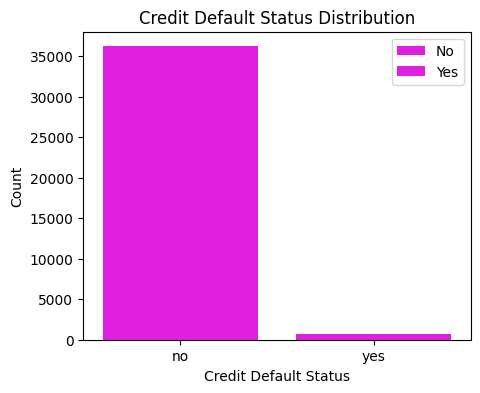

In [22]:
plt.figure(figsize = (5,4))
sns.barplot(x=default.index,y=default.values, color= 'magenta',label=('No','Yes'))
plt.legend()
plt.xlabel('Credit Default Status')
plt.ylabel('Count')
plt.title('Credit Default Status Distribution')
plt.show()

In [23]:
bank1.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [24]:
bank1['day'].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31])

In [25]:
bank1.columns.astype(str)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [26]:
cols= ['job','marital','education', 'default','housing',
       'loan', 'contact',]

In [27]:
cols

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact']

In [28]:
bank1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45205,25,technician,single,secondary,no,505,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [29]:
#determine the columns in the dataset that have string variables


In [30]:
bank1['poutcome'].unique()

array(['unknown'], dtype=object)

In [31]:
#get dummy for the categorical variables in the dataset
bank1['job'] = bank['job'].map({'management':0,'technician':1,'entrepreneur':2, 'blue-collar':3,
       'unknown':4, 'retired':5, 'admin.':6, 'services':7, 'self-employed':8,
       'unemployed':9, 'housemaid':10, 'student':11}).astype('int64')

bank1['marital'] = bank['marital'].map({'married':0, 'single':1, 'divorced':2})

bank1['education'] = bank['education'].map({'tertiary':0, 'secondary':1, 'unknown':4, 'primary':3}).astype('int64')

bank1['default'] = bank['default'].map({'no':0, 'yes':1}).astype('int64')

bank1['housing'] = bank['housing'].map({'yes':1, 'no':0}).astype('int64')

bank1['loan'] = bank['loan'].map({'no':0, 'yes':1}).astype('int64')

bank1['contact'] = bank['contact'].map({'unknown':2, 'cellular':0, 'telephone':1}).astype('int64')

bank1['y'] = bank['y'].map({'no':0, 'yes':1}).astype('int64')


<ipython-input-31-fab5cd0cbcbc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank1['job'] = bank['job'].map({'management':0,'technician':1,'entrepreneur':2, 'blue-collar':3,
<ipython-input-31-fab5cd0cbcbc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank1['marital'] = bank['marital'].map({'married':0, 'single':1, 'divorced':2})
<ipython-input-31-fab5cd0cbcbc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [32]:
bank1.drop(columns=['month','poutcome'], axis= 1, inplace= True)

<ipython-input-32-56a3150fd144>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bank1.drop(columns=['month','poutcome'], axis= 1, inplace= True)


In [33]:
bank1.tail(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,y
45207,71,5,2,3,0,1729,0,0,0,17,456,2,-1,0,1
45209,57,3,0,1,0,668,0,0,1,17,508,4,-1,0,0


In [34]:
#featerues and lables
X = bank1.drop('y', axis = 1)
y = bank1['y']

In [35]:
X.head(2)
# y.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous
0,58,0,0,0,0,2143,1,0,2,5,261,1,-1,0
1,44,1,1,1,0,29,1,0,2,5,151,1,-1,0


In [36]:
col = ['age','balance','day','duration']

In [37]:
X[col]

,age,balance,day,duration
0,58,2143,5,261
1,44,29,5,151
2,33,2,5,76
3,47,1506,5,92
4,33,1,5,198
...,...,...,...,...
45203,23,113,17,266
45205,25,505,17,386
45206,51,825,17,977
45207,71,1729,17,456


In [38]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[col] = sc.fit_transform(X[col])

In [39]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous
0,1.636380,0,0,0,0,0.271165,1,0,2,-1.331204,0.012484,1,-1,0
1,0.294108,1,1,1,0,-0.424340,1,0,2,-1.331204,-0.406959,1,-1,0
2,-0.760534,2,0,1,0,-0.433223,1,1,2,-1.331204,-0.692942,1,-1,0
3,0.581738,3,0,4,0,0.061592,1,0,2,-1.331204,-0.631933,1,-1,0
4,-0.760534,4,1,4,0,-0.433552,0,0,2,-1.331204,-0.227742,1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,-1.719300,11,1,0,0,-0.396704,0,0,0,0.102070,0.031549,1,-1,0
45205,-1.527547,1,1,1,0,-0.267736,0,1,0,0.102070,0.489123,2,-1,0
45206,0.965244,1,0,0,0,-0.162456,0,0,0,0.102070,2.742673,3,-1,0
45207,2.882776,5,2,3,0,0.134959,0,0,0,0.102070,0.756041,2,-1,0


In [40]:
#import neccessary machine learning libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve

In [41]:
#define a function that can automate the training process
#create a list that stores all the evaluation metrics in this function
#Evaluation = []
def model_trainer(model, X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state = 42)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score = (accuracy_score(y_test, y_pred)*100).round(4)
  score2 = confusion_matrix(y_test, y_pred)
  score3 = classification_report(y_test, y_pred)
  score4 = roc_curve(y_test, y_pred)
  print(f"Accuracy score is: {score}")
  print(f"confusion_matrix is: {score2}")
  print(f"classification_report is: {score3}")
  print(f"roc_curve is: {score4}")


In [42]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_trainer(lr,X,y)

Accuracy score is: 91.7091
confusion_matrix is: [[8307   95]
 [ 671  166]]
classification_report is:               precision    recall  f1-score   support

           0       0.93      0.99      0.96      8402
           1       0.64      0.20      0.30       837

    accuracy                           0.92      9239
   macro avg       0.78      0.59      0.63      9239
weighted avg       0.90      0.92      0.90      9239

roc_curve is: (array([0.        , 0.01130683, 1.        ]), array([0.        , 0.19832736, 1.        ]), array([inf,  1.,  0.]))


In [43]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
model_trainer(dc,X,y)

Accuracy score is: 87.8667
confusion_matrix is: [[7817  585]
 [ 536  301]]
classification_report is:               precision    recall  f1-score   support

           0       0.94      0.93      0.93      8402
           1       0.34      0.36      0.35       837

    accuracy                           0.88      9239
   macro avg       0.64      0.64      0.64      9239
weighted avg       0.88      0.88      0.88      9239

roc_curve is: (array([0.        , 0.06962628, 1.        ]), array([0.        , 0.35961768, 1.        ]), array([inf,  1.,  0.]))


In [48]:
#k_neighbours(KNN)
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors= 15, weights = callable)
model_trainer(kn, X,y)

Accuracy score is: 90.9406
confusion_matrix is: [[8402    0]
 [ 837    0]]
classification_report is:               precision    recall  f1-score   support

           0       0.91      1.00      0.95      8402
           1       0.00      0.00      0.00       837

    accuracy                           0.91      9239
   macro avg       0.45      0.50      0.48      9239
weighted avg       0.83      0.91      0.87      9239

roc_curve is: (array([0., 1.]), array([0., 1.]), array([inf,  0.]))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
#randomforest
from sklearn.ensemble import RandomForestClassifier
knn = RandomForestClassifier()
model_trainer(knn,X,y)

Accuracy score is: 91.5467
confusion_matrix is: [[8258  144]
 [ 637  200]]
classification_report is:               precision    recall  f1-score   support

           0       0.93      0.98      0.95      8402
           1       0.58      0.24      0.34       837

    accuracy                           0.92      9239
   macro avg       0.75      0.61      0.65      9239
weighted avg       0.90      0.92      0.90      9239

roc_curve is: (array([0.        , 0.01713878, 1.        ]), array([0.        , 0.23894863, 1.        ]), array([inf,  1.,  0.]))


In [46]:
#k_means
from sklearn.cluster import KMeans
km = KMeans()
model_trainer(km,X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Accuracy score is: 8.3667
confusion_matrix is: [[ 505 2380   56  581 1684  265 1906 1025]
 [  42  268    3   90  192   17  159   66]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]]
classification_report is:               precision    recall  f1-score   support

           0       0.92      0.06      0.11      8402
           1       0.10      0.32      0.15       837
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.08      9239
   macro avg       0.13      0.05      0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
#support vector machine
from sklearn.svm import SVC
svm = SVC()
model_trainer(svm, X,y)

Accuracy score is: 91.3302
confusion_matrix is: [[8364   38]
 [ 763   74]]
classification_report is:               precision    recall  f1-score   support

           0       0.92      1.00      0.95      8402
           1       0.66      0.09      0.16       837

    accuracy                           0.91      9239
   macro avg       0.79      0.54      0.56      9239
weighted avg       0.89      0.91      0.88      9239

roc_curve is: (array([0.        , 0.00452273, 1.        ]), array([0.        , 0.08841099, 1.        ]), array([inf,  1.,  0.]))


In [50]:
#Develop a neural network
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.utils import to_categorical

In [55]:
predictors= X
target = y

In [56]:
predictors.shape[1]

14

In [64]:
model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(predictors.shape[1],))) #1st hidden layer
model.add(Dropout(0.2))
model.add(Dense(50, activation='relu')) #2nd hidden layer
model.add(Dense(1, activation = 'sigmoid')) #output layer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) #optimizer
# model.fit(predictors, target, epochs=5, batch_size=32, verbose=1, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
model.fit(predictors, target, epochs=100, batch_size=32, verbose=1, validation_split=0.2)

Epoch 1/100
924/924 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9474 - loss: 0.1350 - val_accuracy: 0.7858 - val_loss: 0.5535
Epoch 2/100
924/924 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9466 - loss: 0.1333 - val_accuracy: 0.7839 - val_loss: 0.5637
Epoch 3/100
924/924 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9472 - loss: 0.1398 - val_accuracy: 0.7843 - val_loss: 0.5787
Epoch 4/100
924/924 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9469 - loss: 0.1354 - val_accuracy: 0.7827 - val_loss: 0.5808
Epoch 5/100
924/924 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9483 - loss: 0.1332 - val_accuracy: 0.7835 - val_loss: 0.5323
Epoch 6/100
924/924 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9469 - loss: 0.1360 - val_accuracy: 0.7850 - val_loss: 0.5747
Epoch 7/100
924/924 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9496 - loss: 0.1289 - val_accuracy: 0.7818 - val_loss: 0.5280
Epoch 8/100
924/924 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9477 - loss: 0.1322 - val_accu

In [70]:
#evaluate the model's performance during training.
loss, accuracy = model.evaluate(predictors, target)
print(f'loss: {loss}, accuracy: {accuracy}')


1155/1155 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9704 - loss: 0.0765
loss: 0.20430812239646912, accuracy: 0.9270173907279968


In [73]:
#predict new data using this model
def predict_new_data(model, new_data):
  prediction = model.predict(new_data)
  return prediction


In [89]:
#generate new data based on the features and tarteg variables of the dataset used
new_data = X.sample(10)
new_data


,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous
17565,0.773491,8,0,1,0,-0.316428,0,0,0,1.535344,-0.300192,4,-1,0
44747,-1.623423,11,1,0,0,-0.159495,0,0,0,-0.853446,1.606365,1,-1,0
3194,0.677614,6,0,1,0,0.301433,1,1,2,-0.136809,1.896162,2,-1,0
9628,1.828133,5,0,1,0,0.416912,0,0,2,-1.211764,-0.410772,4,-1,0
24829,0.965244,2,0,0,1,-0.432565,1,0,0,0.221510,-0.677690,1,-1,0
25902,-0.856411,0,0,0,0,1.687838,0,0,1,0.340949,0.485310,1,-1,0
18993,0.198232,1,0,0,0,-0.433881,0,0,0,-1.450643,4.691174,2,-1,0
34261,-1.431670,6,1,1,0,-0.381241,0,1,0,-1.450643,-0.326883,2,-1,0
42774,-0.472904,0,0,0,0,0.865339,0,0,0,1.415905,-0.487034,2,-1,0
1002,-1.048164,3,1,3,0,-0.216741,1,0,2,-1.092325,2.494821,2,-1,0


In [74]:
#predict the target variable using the new data
prediction = predict_new_data(model, new_data)
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


array([[2.3594981e-03],
       [5.9754215e-04],
       [1.0139925e-04],
       [5.6121331e-02],
       [3.2016763e-04],
       [4.3232745e-04],
       [5.0930262e-01],
       [9.5851727e-02],
       [5.9641260e-01],
       [6.6963040e-08]], dtype=float32)

In [86]:
#convert the binary classification to class labels
def convert_to_class(prediction):
  class_labels = np.where(prediction >= 0.5, 'Yes','No')
  return class_labels

In [87]:
class_labels = convert_to_class(prediction)
print(class_labels)

[['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['No']
 ['Yes']
 ['No']
 ['Yes']
 ['No']]


In [123]:
# If you have a binary classification problem, convert probabilities to class la
predicted_labels = (prediction > 0.5).astype(int)
predicted_labels = np.where(predicted_labels> 0.5,'yes', 'no')
print(np.array(predicted_labels))

[['no']
 ['no']
 ['no']
 ['no']
 ['no']
 ['no']
 ['yes']
 ['no']
 ['yes']
 ['no']]


In [83]:
predicted_labels = (prediction > 0.5).astype(int)

# Convert to "Yes" or "No"
predicted_labels = ['Yes' if label == 1 else 'No' for label in predicted_labels]

print(predicted_labels)

['No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No']


In [90]:
#save this model for production
import pickle
with open('bank_model.pkl', 'wb') as file:
  pickle.dump(model, file)


In [93]:
#use the sove model for production purpose
with open('bank_model.pkl', 'rb') as file:
  model = pickle.load(file)


In [94]:
model

<Sequential name=sequential_6, built=True>

In [124]:
#convert the predictors shape into an image shape
predictors_array = predictors.values.reshape(28,28,1)
predictors_array

ValueError: cannot reshape array of size 517356 into shape (28,28,1)

In [130]:
# Select the first 784 values from the DataFrame
subset = predictors.values.flatten()[:784]

# Reshape the subset into a 28x28x1 array
predictors_array1 = subset.reshape(28, 28, 1)

# Print the reshaped array
print(predictors_array1)

[[[ 1.63638016e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 0.00000000e+00]
  [ 2.71165267e-01]
  [ 1.00000000e+00]
  [ 0.00000000e+00]
  [ 2.00000000e+00]
  [-1.33120377e+00]
  [ 1.24836811e-02]
  [ 1.00000000e+00]
  [-1.00000000e+00]
  [ 0.00000000e+00]
  [ 2.94108145e-01]
  [ 1.00000000e+00]
  [ 1.00000000e+00]
  [ 1.00000000e+00]
  [ 0.00000000e+00]
  [-4.24340213e-01]
  [ 1.00000000e+00]
  [ 0.00000000e+00]
  [ 2.00000000e+00]
  [-1.33120377e+00]
  [-4.06958841e-01]
  [ 1.00000000e+00]
  [-1.00000000e+00]
  [ 0.00000000e+00]]

 [[-7.60534153e-01]
  [ 2.00000000e+00]
  [ 0.00000000e+00]
  [ 1.00000000e+00]
  [ 0.00000000e+00]
  [-4.33223206e-01]
  [ 1.00000000e+00]
  [ 1.00000000e+00]
  [ 2.00000000e+00]
  [-1.33120377e+00]
  [-6.92942378e-01]
  [ 1.00000000e+00]
  [-1.00000000e+00]
  [ 0.00000000e+00]
  [ 5.81737863e-01]
  [ 3.00000000e+00]
  [ 0.00000000e+00]
  [ 4.00000000e+00]
  [ 0.00000000e+00]
  [ 6.15924237e-02]
  [ 1.00000000e+00]
  [ 0.00000000e+00

In [132]:
#Build a convolutional neural network
model = Sequential()
# The input_shape needs to have at least three dimensions (height, width, channels)
# Assuming your images are 28x28 grayscale images
model.add(Conv2D(32, kernel_size=(3,3),strides =(3,3), activation='relu', input_shape=(28,28,1),))
model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2),padding='valid'))
#2nd convolutional layer
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
#flattening the layer
model.add(Flatten())
#fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
# For binary classification use sigmoid activation and one output neuron
model.add(Dense(1, activation='sigmoid'))
#compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# If you have image data in predictors, you need to convert it to a NumPy array and reshape it
# For example, if predictors is a pandas DataFrame with image data in a column named 'image':
# predictors = np.array(predictors['image'].tolist()).reshape(-1, 28, 28, 1)

#train model
# model.fit(predictors, target, epochs=5, verbose=1, batch_size=32, validation_split=0.2)
# #evaluation metrics
# loss, accuracy = model.evaluate(predictors, target)
# print(f"loss:{loss}, accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [137]:
predictors_reshaped = predictors_array1.reshape(-1, 28, 28, 1)

In [140]:
model.fit(predictors_reshaped, target, epochs=5, verbose=1, batch_size=32,validation_split=0.2)
# #evaluation metrics
loss, accuracy = model.evaluate(predictors, target)
print(f"loss:{loss}, accuracy: {accuracy}")

ValueError: Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 1
'y' sizes: 36954


In [112]:
predictors_array = predictors.values.reshape(-1, 14, 188, 1)

ValueError: cannot reshape array of size 517356 into shape (14,188,1)

In [97]:
import tensorflow as tf

In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # Changed tf to tensorflow and model to models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout # Changed Convo2D to Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [109]:
#Build a convolutional neural network
tf.model = Sequential()

tf.model.add(Conv2D(32, kernel_size=(3,3),strides =(3,3), activation='relu', input_shape=(predictors.shape[1],28,1)))
tf.model.add(MaxPooling2D(pool_size=(2,2), strides= (2,2),padding='valid'))
#2nd convolutional layer
tf.model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
tf.model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
#flattening the layer
tf.model.add(Flatten())
#fully connected layer
tf.model.add(Dense(128, activation='relu'))
tf.model.add(Dropout(0.2))
tf.model.add(Dense(64, activation='relu'))
tf.model.add(Dropout(0.2))
tf.model.add(Dense(1, activation='sigmoid'))
#compile model
tf.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#train model
# model.fit(predictors, target, epochs=5, verbose=1, batch_size=32, validation_split=0.2)
# #evaluation metrics
# loss, accuracy = model.evaluate(predictors, target)
# print(f"loss:{loss}, accuracy: {accuracy}")




/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [110]:
tf.model.fit(predictors, target, epochs=5, verbose=1, batch_size=32, validation_split=0.2)
# #evaluation metrics
# loss, accuracy = tf.as_dtypemodel.evaluate(predictors, target)
# # print(f"loss:{loss}, accuracy: {accuracy}")

Epoch 1/5


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 14), dtype=float32). Expected shape (None, 14, 28, 1), but input has incompatible shape (None, 14)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 14), dtype=float32)
  • training=True
  • mask=None

In [ ]:
#evaluation metrics
loss, accuracy = tf.as_dtypemodel.evaluate(predictors, target)
print(f"loss:{loss}, accuracy: {accuracy}")